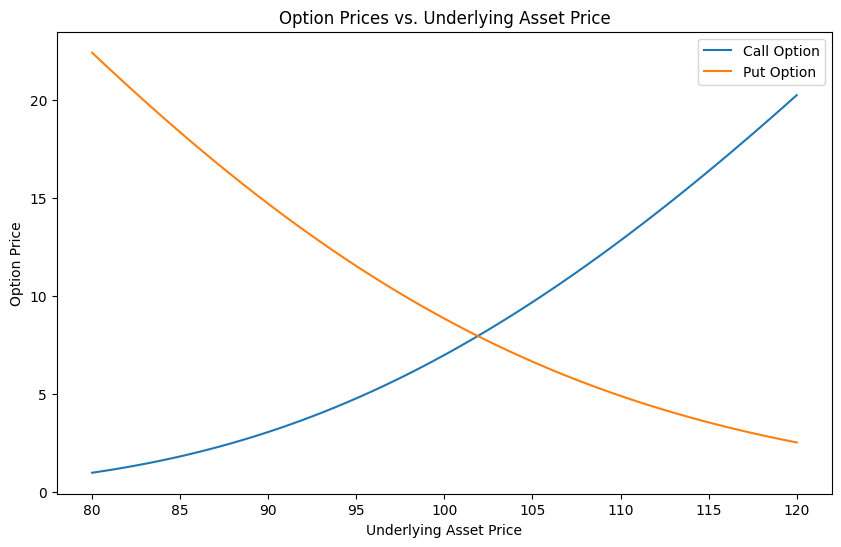

In [1]:
#%pip install matplotlib
#%pip install scipy

import numpy as np
import matplotlib.pyplot as plt # type: ignore
from scipy.stats import norm # type: ignore

# --- Simulation Parameters ---
num_simulations = 25  # Number of simulations for each scenario
time_steps = 252  # Number of time steps (e.g., trading days in a year)
T = 1  # Time to expiry (in years)
dt = T / time_steps

# --- Initial Values ---
S0 = 100  # Initial price of the underlying asset
K = 105  # Strike price
r = 0.05  # Risk-free interest rate
q = 0.02  # Dividend yield
sigma = 0.2  # Volatility
rf = 0.03  # Foreign risk-free interest rate (for FX options) - initially same as domestic for simplification

# --- Helper Functions ---

def simulate_asset_price(S0, r, q, sigma, T, dt, num_simulations, time_steps):
    """Simulates asset price paths using Geometric Brownian Motion."""
    Z = np.random.standard_normal((time_steps, num_simulations))
    S = np.zeros((time_steps + 1, num_simulations))
    S[0] = S0
    for t in range(1, time_steps + 1):
        S[t] = S[t - 1] * np.exp((r - q - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z[t - 1])
    return S

def black_scholes_call(S, K, T, r, q, sigma):
    """Calculates the Black-Scholes price of a European call option."""
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, K, T, r, q, sigma):
    """Calculates the Black-Scholes price of a European put option."""
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return put_price

# --- Simulations and Visualizations ---

# 1. Value of Underlying Asset

# Effect on Option Price:
S_range = np.linspace(80, 120, 100)
call_prices_S = black_scholes_call(S_range, K, T, r, q, sigma)
put_prices_S = black_scholes_put(S_range, K, T, r, q, sigma)

plt.figure(figsize=(10, 6))
plt.plot(S_range, call_prices_S, label="Call Option")
plt.plot(S_range, put_prices_S, label="Put Option")
plt.title("Option Prices vs. Underlying Asset Price")
plt.xlabel("Underlying Asset Price")
plt.ylabel("Option Price")
plt.legend()
plt.show()

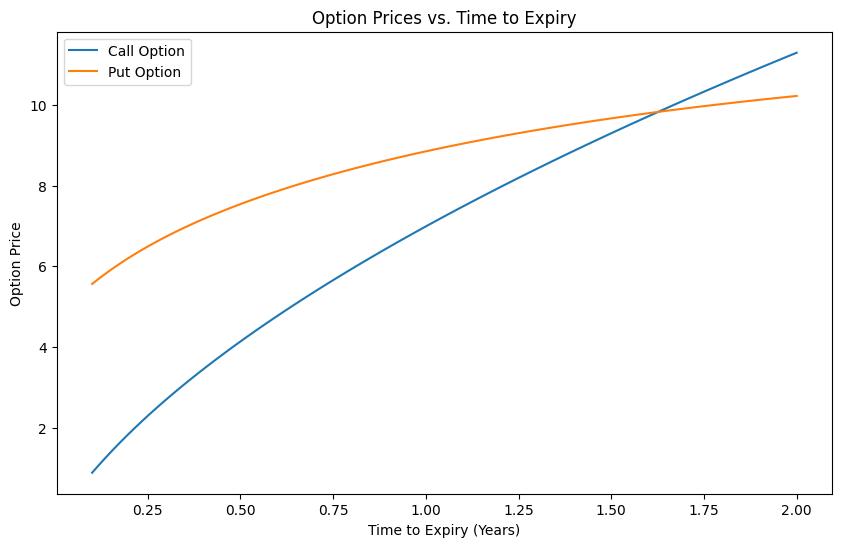

In [3]:
# 2. Time to Expiry
T_range = np.linspace(0.1, 2, 100)  # Time to expiry from 0.1 to 2 years
call_prices_T = black_scholes_call(S0, K, T_range, r, q, sigma)
put_prices_T = black_scholes_put(S0, K, T_range, r, q, sigma)

plt.figure(figsize=(10, 6))
plt.plot(T_range, call_prices_T, label="Call Option")
plt.plot(T_range, put_prices_T, label="Put Option")
plt.title("Option Prices vs. Time to Expiry")
plt.xlabel("Time to Expiry (Years)")
plt.ylabel("Option Price")
plt.legend()
plt.show()

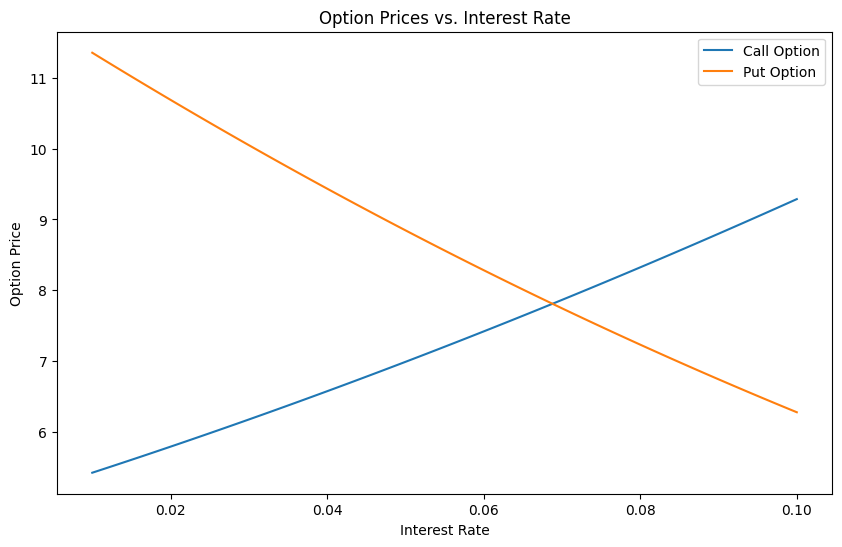

In [4]:
# 3. Interest Rate
r_range = np.linspace(0.01, 0.1, 100)  # Interest rate from 1% to 10%
call_prices_r = black_scholes_call(S0, K, T, r_range, q, sigma)
put_prices_r = black_scholes_put(S0, K, T, r_range, q, sigma)

plt.figure(figsize=(10, 6))
plt.plot(r_range, call_prices_r, label="Call Option")
plt.plot(r_range, put_prices_r, label="Put Option")
plt.title("Option Prices vs. Interest Rate")
plt.xlabel("Interest Rate")
plt.ylabel("Option Price")
plt.legend()
plt.show()

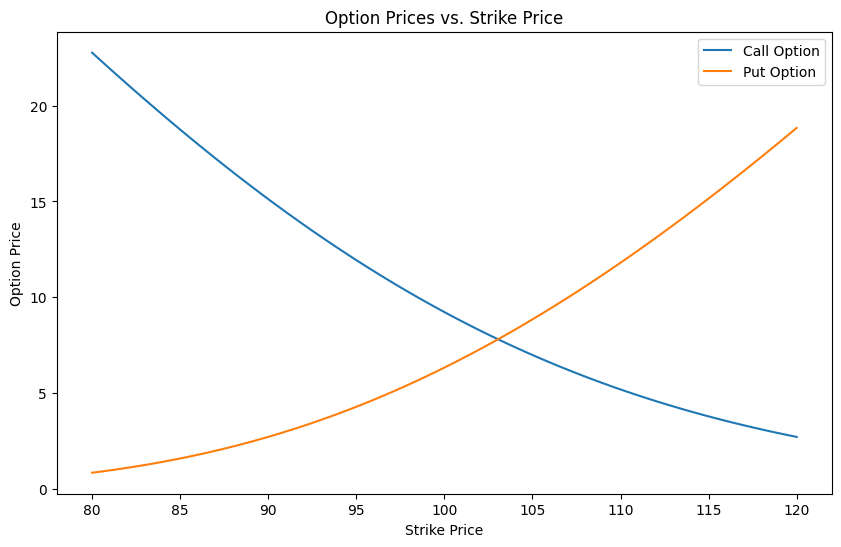

In [5]:
# 4. Strike Price
K_range = np.linspace(80, 120, 100)
call_prices_K = black_scholes_call(S0, K_range, T, r, q, sigma)
put_prices_K = black_scholes_put(S0, K_range, T, r, q, sigma)

plt.figure(figsize=(10, 6))
plt.plot(K_range, call_prices_K, label="Call Option")
plt.plot(K_range, put_prices_K, label="Put Option")
plt.title("Option Prices vs. Strike Price")
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.legend()
plt.show()

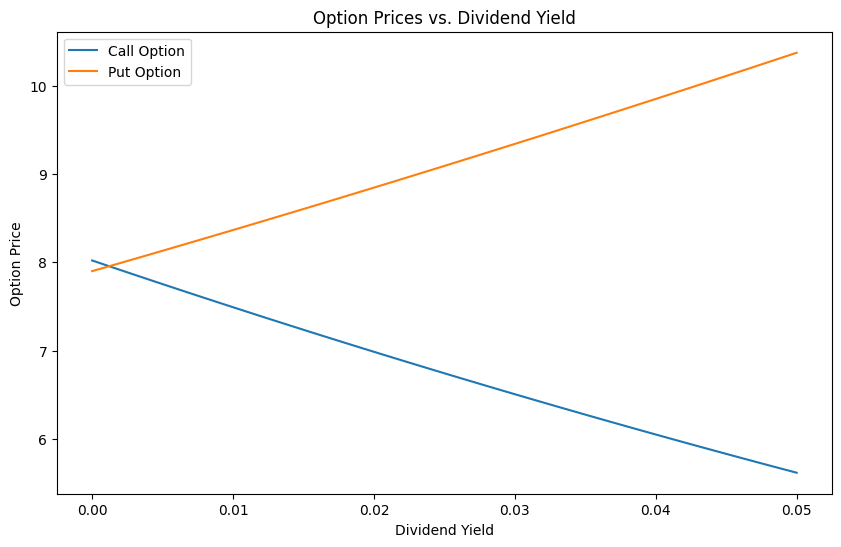

In [6]:
# 5. Dividends
q_range = np.linspace(0, 0.05, 100)  # Dividend yield from 0% to 5%
call_prices_q = black_scholes_call(S0, K, T, r, q_range, sigma)
put_prices_q = black_scholes_put(S0, K, T, r, q_range, sigma)

plt.figure(figsize=(10, 6))
plt.plot(q_range, call_prices_q, label="Call Option")
plt.plot(q_range, put_prices_q, label="Put Option")
plt.title("Option Prices vs. Dividend Yield")
plt.xlabel("Dividend Yield")
plt.ylabel("Option Price")
plt.legend()
plt.show()

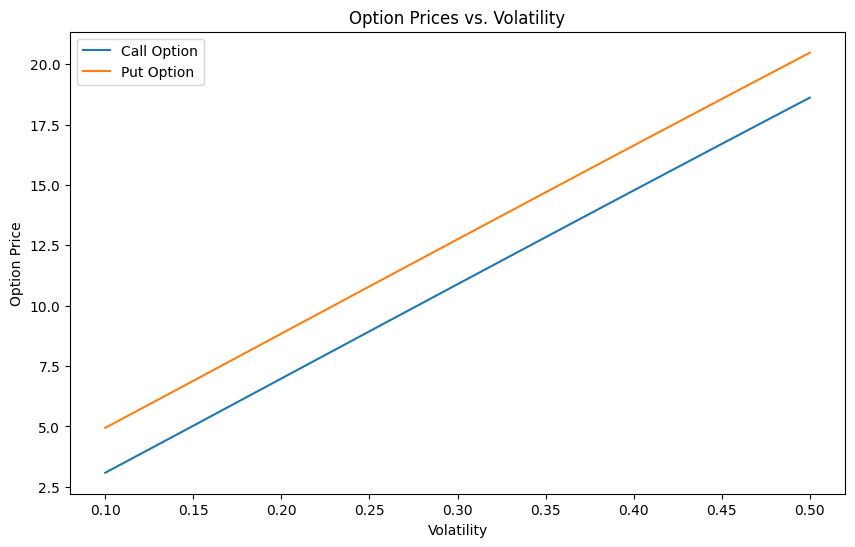

In [7]:
# 6. Volatility
sigma_range = np.linspace(0.1, 0.5, 100)  # Volatility from 10% to 50%
call_prices_sigma = black_scholes_call(S0, K, T, r, q, sigma_range)
put_prices_sigma = black_scholes_put(S0, K, T, r, q, sigma_range)

plt.figure(figsize=(10, 6))
plt.plot(sigma_range, call_prices_sigma, label="Call Option")
plt.plot(sigma_range, put_prices_sigma, label="Put Option")
plt.title("Option Prices vs. Volatility")
plt.xlabel("Volatility")
plt.ylabel("Option Price")
plt.legend()
plt.show()